<a href="https://colab.research.google.com/github/MoisesTedeschi/COVID-19/blob/master/Informa%C3%A7%C3%B5es_di%C3%A1rias_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O script a seguir tem como base os projetos de: ["Paluch Guilherme"](https://github.com/gorpo/COVID-19) e ["João Victor"](https://github.com/Riquinho/coronavirus) da comunidade Python Brasil.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests, urllib.request, json

#INFORMAÇÕES DIÁRIAS DE CASOS CONFIRMADOS, RECUPERADOS E ÓBITOS

In [2]:
response = urllib.request.urlopen('https://pomber.github.io/covid19/timeseries.json')
data = json.loads(response.read())

print('Lista de Paises disponiveis: \n')
print(list(data.keys()))

Lista de Paises disponiveis: 

['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden', 'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colombia', 'Costa Rica', 'Peru', 'Serbia', 'Slovakia', 'Togo', 'Malta', 'Martinique', 'Bulga

In [0]:
pais1 = "China"
pais2 = "Italy"
pais3 = "Brazil"

In [0]:
def coronavirus_brasil(pais1, pais2, pais3):
  url = "https://pomber.github.io/covid19/timeseries.json"
  requisicao = requests.get(url, timeout=3000)
  resposta = requisicao.json()
  dicionario_pais1 = resposta[pais1]
  dados_pais1 = dicionario_pais1[-1]

  dicionario_pais2 = resposta[pais2]
  dados_pais2 = dicionario_pais2[-1]

  dicionario_pais3 = resposta[pais3]
  dados_pais3 = dicionario_pais3[-1]

  print("Coronavírus COVID-19 na China\n")
  print(f"""Pais: {pais1}
Data: {dados_pais1['date']}
Confirmados: {dados_pais1['confirmed']}
Mortos: {dados_pais1['deaths']}
Recuperados: {dados_pais1['recovered']}""")
  
  print("\n\nCoronavírus COVID-19 na Itália\n")
  print(f"""Pais: {pais2}
Data: {dados_pais2['date']}
Confirmados: {dados_pais2['confirmed']}
Mortos: {dados_pais2['deaths']}
Recuperados: {dados_pais2['recovered']}""")
  
  print("\n\nCoronavírus COVID-19 no Brasil\n")
  print(f"""Pais: {pais3}
Data: {dados_pais3['date']}
Confirmados: {dados_pais3['confirmed']}
Mortos: {dados_pais3['deaths']}
Recuperados: {dados_pais3['recovered']}""")


In [5]:
coronavirus_brasil(pais1, pais2, pais3)

Coronavírus COVID-19 na China

Pais: China
Data: 2020-3-19
Confirmados: 81156
Mortos: 3249
Recuperados: 70535


Coronavírus COVID-19 na Itália

Pais: Italy
Data: 2020-3-19
Confirmados: 41035
Mortos: 3405
Recuperados: 4440


Coronavírus COVID-19 no Brasil

Pais: Brazil
Data: 2020-3-19
Confirmados: 621
Mortos: 6
Recuperados: 2


#GRÁFICO - CRESCIMENTO DE INFECTADOS


In [0]:
def dados_paises(pais1, pais2, menor_data):
  '''Função recebe o nome de dois países, uma data menor para a contagem dos
  dos dados e a plotagem do gráfico de infectados.
  '''
  dados_confirmed_ps1 = []
  dados_confirmed_ps2 = []

  while menor_data  > 0:
    
    confirmed_ps1 = data[pais1][menor_data]['confirmed']	 
    confirmed_ps2 = data[pais2][menor_data]['confirmed']
    
    dados_confirmed_ps1.append(confirmed_ps1)
    dados_confirmed_ps2.append(confirmed_ps2)

    menor_data  = menor_data - 1

  dados_confirmed_ps1.reverse()
  dados_confirmed_ps2.reverse()

  print('\nDados Capturados: \n')
  print(dados_confirmed_ps1)
  print(dados_confirmed_ps2)
  print('\n')

  menor_data = len(data[pais1]) -1 if len(data[pais1]) < len(data[pais2]) else len(data[pais2]) -1
  print('Dias: ' + str(menor_data))


  for i in list(range(menor_data)):
    try:
      dados_confirmed_ps1.remove(0)
    except:
      pass
    try:
      dados_confirmed_ps2.remove(0)
    except:
      pass

  print('\nDados Capturados(Removendo os Zeros): \n')
  print(dados_confirmed_ps1)
  print(dados_confirmed_ps2)
  print('\n')


  faltantes_ps1 = menor_data - len(dados_confirmed_ps1)
  print('Dados Faltantes no País 1: ' + str(faltantes_ps1))

  faltantes_ps2 = menor_data - len(dados_confirmed_ps2)
  print('Dados Faltantes no País 2: ' + str(faltantes_ps2))


  for i in range(faltantes_ps1):
    num = np.average(dados_confirmed_ps1, weights  = list(range(len(dados_confirmed_ps1))))
    dados_confirmed_ps1.append(dados_confirmed_ps1[-1] + num)

  for i in range(faltantes_ps2):
    num = np.average(dados_confirmed_ps2,weights  = list(range(len(dados_confirmed_ps2))))
    dados_confirmed_ps2.append(dados_confirmed_ps2[-1] + num)

  print(dados_confirmed_ps1)
  print(dados_confirmed_ps2)

  print('''\n\nO script pega o numero de dias de infectados em ambos os paises e
projeta o crescimento dos infectados por dias (em ambos os paises). Caso algum
pais tenha menos dias de registro, o calculo da projecao e realizado por media
ponderada.''') 


  fig, ax = plt.subplots(figsize=(16,10))
  ax.plot(list(range(menor_data)) , dados_confirmed_ps1, label=str(pais1))
  ax.plot(list(range(menor_data)) , dados_confirmed_ps2, label=str(pais2))
  ax.set_title('CRESCIMENTO DO NÚMERO DE INFECTADOS')
  ax.set_xlabel('DIAS')
  ax.set_ylabel('INFECTADOS')
  plt.legend(loc='best')
  plt.show()	

#A IMPORTÂNCIA DA QUARENTENA (DISTANCIAMENTO SEGURO) PARA EVITAR O CRESCIMENTO DESENFREADO DO NÚMERO DE INFECTADOS PELO COVID-19


"Por que estão batendo na tecla de evitar aglomerações de pessoas e #FicaEmCasa o máximo possível? Quando todas as pessoas estão circulando (esquerda) o vírus se espalha muito mais rápido que se boa parte ficar isolada (direita). Não é brincadeira nem frescura. Pense no coletivo." - [Ciência USP](https://www.facebook.com/cienciausp/videos/281876369466015/?v=281876369466015)

<img src="https://media.giphy.com/media/cNfRqWTAw6xrxlhGjb/giphy.gif" width="100%">

A menor data serve de inicio da contagem: 57

Dados Capturados: 

[643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814, 39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434, 74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166, 78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690, 80770, 80823, 80860, 80887, 80921, 80932, 80945, 80977, 81003, 81033, 81058, 81102, 81156]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155, 229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 12462, 17660, 21157, 24747, 27980, 31506, 35713, 41035]


Dias: 57

Dados Capturados(Removendo os Zeros): 

[643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814, 39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434, 74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166, 78

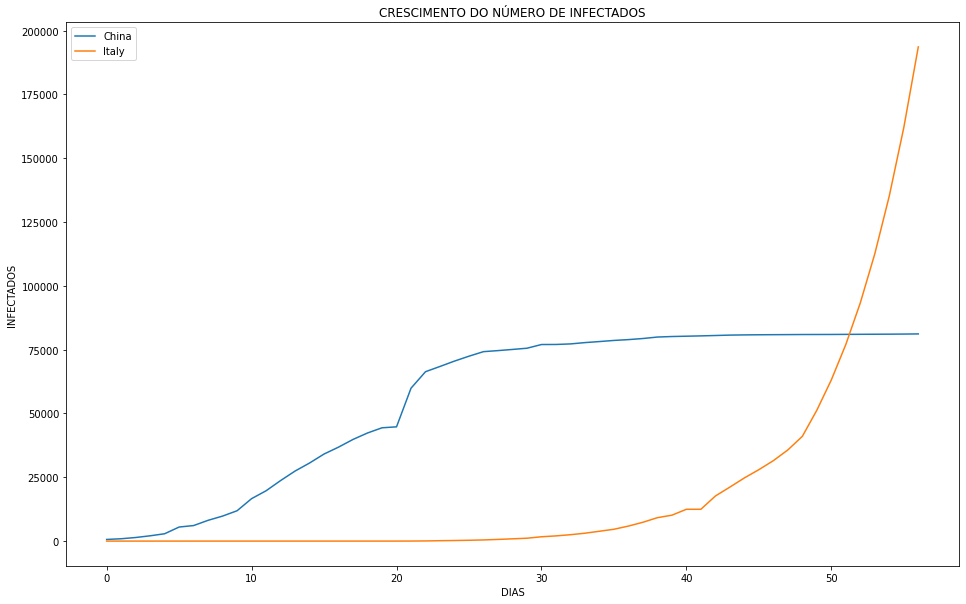

In [7]:
menor_data = len(data[pais1]) -1 if len(data[pais1]) < len(data[pais2]) else len(data[pais2]) -1
print('A menor data serve de inicio da contagem: ' + str(menor_data))

#Dados de crescimento de infectados na China e na Itália.
dados_paises("China", "Italy", menor_data)


Dados Capturados: 

[643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814, 39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434, 74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166, 78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690, 80770, 80823, 80860, 80887, 80921, 80932, 80945, 80977, 81003, 81033, 81058, 81102, 81156]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 4, 4, 13, 13, 20, 25, 31, 38, 52, 151, 151, 162, 200, 321, 372, 621]


Dias: 57

Dados Capturados(Removendo os Zeros): 

[643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814, 39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434, 74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166, 78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690, 80770, 80823, 80860, 80887, 80921, 80932, 80945

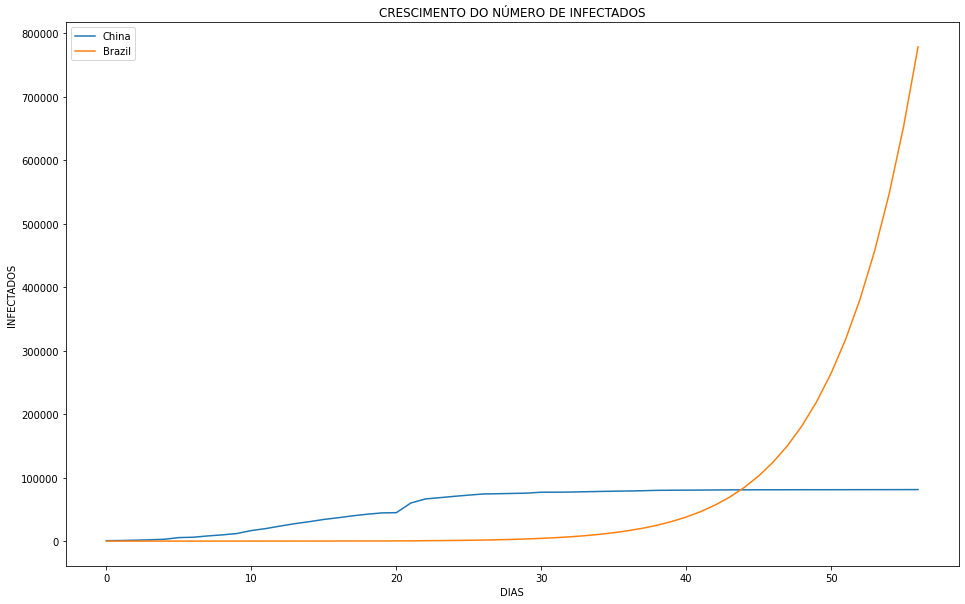

In [8]:
#Dados de crescimento de infectados na China e no Brasil.
dados_paises("China", "Brazil", menor_data)


Dados Capturados: 

[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155, 229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 12462, 17660, 21157, 24747, 27980, 31506, 35713, 41035]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 4, 4, 13, 13, 20, 25, 31, 38, 52, 151, 151, 162, 200, 321, 372, 621]


Dias: 57

Dados Capturados(Removendo os Zeros): 

[2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155, 229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 12462, 17660, 21157, 24747, 27980, 31506, 35713, 41035]
[1, 1, 1, 2, 2, 2, 2, 4, 4, 13, 13, 20, 25, 31, 38, 52, 151, 151, 162, 200, 321, 372, 621]


Dados Faltantes no País 1: 8
Dados Faltantes no País 2: 34
[2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155, 229, 322, 453, 65

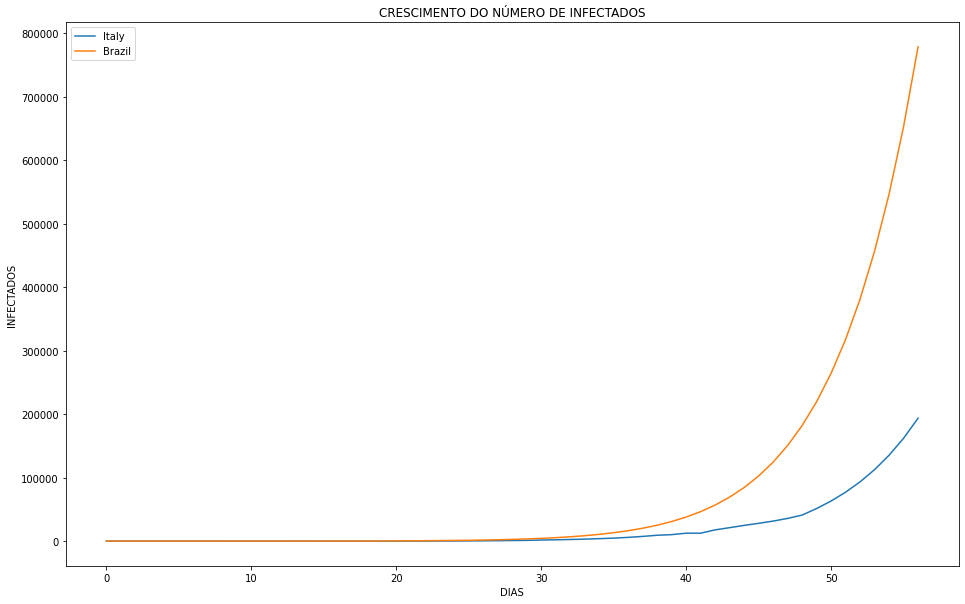

In [9]:
#Dados de crescimento de infectados na Itália e no Brasil.
dados_paises("Italy", "Brazil", menor_data)